In [1]:
import sys
sys.path.append('/home/fi0/dev/sandbox/SR-INS/srins/Jiao_Res/graphite-DOS/dgsres')

In [2]:
%matplotlib notebook
from matplotlib import pyplot as plt

In [3]:
import numpy as np
import histogram.hdf as hh, histogram as H
import lmfit
import makingRF3_orig as M

ImportError: No module named makingRF3_orig

In [8]:
from dgsres import icg

In [9]:
!pwd

/home/fi0/dev/figures_for_paper


In [10]:
# dgsres.icg.test2()

In [11]:
geom = icg.Geom(l1=11.6, l2=2.0, l3=3.)

In [12]:
ls  /home/fi0/dev/sandbox/SR-INS/srins/Jiao_Res/graphite-DOS/Ei_300/out

ie-E_0.0.h5    ie-E_150.0.h5  ie-E_20.0.h5   ie-E_255.0.h5  ie-E_45.0.h5
ie-E_100.0.h5  ie-E_15.0.h5   ie-E_205.0.h5  ie-E_260.0.h5  ie-E_50.0.h5
ie-E_10.0.h5   ie-E_155.0.h5  ie-E_210.0.h5  ie-E_265.0.h5  ie-E_5.0.h5
ie-E_105.0.h5  ie-E_160.0.h5  ie-E_215.0.h5  ie-E_270.0.h5  ie-E_55.0.h5
ie-E_110.0.h5  ie-E_165.0.h5  ie-E_220.0.h5  ie-E_275.0.h5  ie-E_60.0.h5
ie-E_115.0.h5  ie-E_170.0.h5  ie-E_225.0.h5  ie-E_280.0.h5  ie-E_65.0.h5
ie-E_120.0.h5  ie-E_175.0.h5  ie-E_230.0.h5  ie-E_285.0.h5  ie-E_70.0.h5
ie-E_125.0.h5  ie-E_180.0.h5  ie-E_235.0.h5  ie-E_290.0.h5  ie-E_75.0.h5
ie-E_130.0.h5  ie-E_185.0.h5  ie-E_240.0.h5  ie-E_295.0.h5  ie-E_80.0.h5
ie-E_135.0.h5  ie-E_190.0.h5  ie-E_245.0.h5  ie-E_30.0.h5   ie-E_85.0.h5
ie-E_140.0.h5  ie-E_195.0.h5  ie-E_250.0.h5  ie-E_35.0.h5   ie-E_90.0.h5
ie-E_145.0.h5  ie-E_200.0.h5  ie-E_25.0.h5   ie-E_40.0.h5   ie-E_95.0.h5


residual function defined

In [13]:
def residual(params, x, data, eps_data):
    a = params['a']
    b = params['b']
    R = params['R']
    sigma = params['sigma']
    t0 = params['t0']
    model = icg.resolution(x, Ei=Ei, E0=E0, a=a, b=b, R=R, sigma=sigma, t0=t0, geom=geom)
    sum = model.sum()
    if np.abs(sum)<1e-10: sum = 1e-10
    model/=sum
    model[model!=model] = np.nanmax(model)
    ret = (data-model) / eps_data
    return ret

fitting parameters defined

In [14]:
params = lmfit.Parameters()
params.add('a', min=0., max=3.)
params.add('b', min=0., max=.3)
params.add('R', value=0.3, vary=False)
params.add('sigma', min=0., max=20.)
params.add('t0', min=0., max=10.)

In [15]:
# E0=120
# name="/home/fi0/dev/sandbox/SR-INS/srins/Jiao_Res/graphite-DOS/Ei_300/out/ie-E_%s.h5" % E0

data and fitting function

In [16]:

def getData(name):
    # get mcvine sim result
    res_E = hh.load(name)
    x = res_E.E
    y0 = res_E.I
    scale = y0.sum()
    y0/=scale
    y0err = res_E.E2**.5
    y0err/=scale
    return x, y0, y0err

def fit(name):
    # get mcvine sim result
    x, y0, y0err = getData(name)
    # prepare fitting data
    data = y0
    eps_data = 1.
    # fit
    out = lmfit.minimize(residual, params, args=(x, data, eps_data), method='differential_evolution')
    return out

fitting the data

In [30]:
Ei=300
results = {}
for E0 in np.arange(0., 300., 40.):
    name="/home/fi0/dev/sandbox/SR-INS/srins/Jiao_Res/graphite-DOS/Ei_300/out/ie-E_%s.h5" % E0
    print E0
    results[E0] = fit(name)
    continue

0.0
40.0
80.0
120.0
160.0
200.0
240.0
280.0


just to see the parameters

In [18]:
# results[0.].params

just to check

In [19]:
# E0=0.
# x,y0,y0err = getData(name)
# # print x
# y = icg.resolution(x, Ei=300., E0=E0, geom=geom, **results[E0].params.valuesdict())
# y/=y.sum()
# plt.figure()
# plt.errorbar(x, y0, y0err)
# plt.plot(x, y)
# plt.show()

<IPython.core.display.Javascript object>


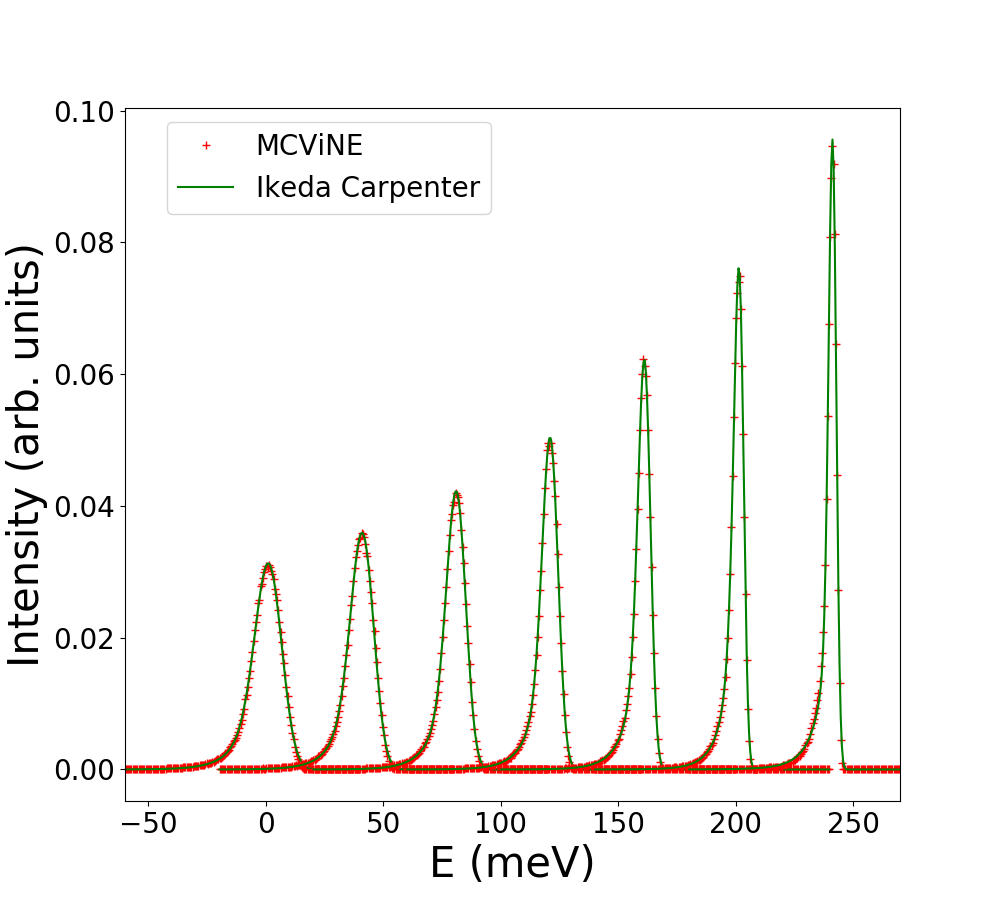

In [38]:
diff=[]
plt.figure(figsize=(10,9))
# RF = np.zeros((len(Et_peak), len(Et_range_Haxis)))
RF_300=[]
RF_x_300=[]
# plt.figure()
### Et=125 for Ei=130 does not work because of the mcvine simulation
for E0 in np.arange(0., 280., 40.):
    name="/home/fi0/dev/sandbox/SR-INS/srins/Jiao_Res/graphite-DOS/Ei_300/out/ie-E_%s.h5" % E0
    x,y0,y0err = getData(name)
    y = icg.resolution(x, Ei=300, E0=E0, geom=geom, **results[E0].params.valuesdict())
    y/=y.sum()
#     print x
    Ett=(x*y).sum()
    d=np.abs(E0-Ett)
    diff.append(d)
    RF_300.append(y)
    RF_x_300.append(x)
#     print E0, d
#     continue
    # plt.errorbar(x, y0, y0err)
#     plt.plot(x,y0, '+')
    plt.plot(x,y0, '+', color='red')
    plt.plot(x, y, color='green' )
plt.legend(['MCViNE','Ikeda Carpenter'], fontsize=20,bbox_to_anchor=(0.49, 1))
# plt.xlabel('E')
#     plt.plot(E0, diff)
# plt.legend( fontsize=20,bbox_to_anchor=(0.49, 1))
plt.xlim(-60, 270)
plt.xlabel('E (meV)', fontsize=30)
plt.xticks(fontsize=20)
plt.ylabel('Intensity (arb. units)',fontsize=30)
plt.yticks(fontsize=20)
# plt.show()

plt.savefig('Fitting_300.eps',  dpi=1000)

# plt.show()

# print diff
# E00=np.arange(0., 120., 5.)
# print E00
# print len(E00)
# RF_fit =np.reshape(RF, (len(E00),-1))
# RF_X=np.reshape(RF_x,(len(E00),-1) )
# print RF_fit.shape[0]
# print RF_fit.shape[1]

# plt.figure()
# plt.plot(RF_X[24],RF_fit[24])
# plt.show()

fitting the data for 130

In [21]:
Ei=130
results_30 = {}
for E0 in np.arange(0., 130., 10.):
    name="/home/fi0/dev/sandbox/SR-INS/srins/Jiao_Res/graphite-DOS/Ei_130/out/ie-E_%s.h5" % E0
    print E0
    results_30[E0] = fit(name)
    continue

0.0
10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0
100.0
110.0
120.0


In [1]:
plt.figure()
RF_130=[]
RF_x_130=[]
a_=[]
import matplotlib.lines as mlines
for E0_30 in np.arange(0., 120., 20.):
#     print np.int(E0_30) % 2.0
    name="/home/fi0/dev/sandbox/SR-INS/srins/Jiao_Res/graphite-DOS/Ei_130/out/ie-E_%s.h5" % E0_30
    x_30,y0_30,y0err_30 = getData(name)
    y_30 = icg.resolution(x_30, Ei=130, E0=E0_30, geom=geom, **results_30[E0_30].params.valuesdict())
    y_30/=y_30.sum()
    RF_130.append(y_30)
    RF_x_130.append(x_30)
    a_.append(results_30[E0_30].params['a'].value)
#     plt.plot(x_30,results_30[E0_30].params['a'].value)
    plt.plot(x_30,y0_30, '+', color='red')
    plt.plot(x_30,y0_30, color='green')
plt.legend(['MCViNE','Ikeda Carpented model fitted'])
plt.xlabel('E')
#     plt.plot(E0, diff)
plt.show()
#     plt.plot(x_30,y_30, color='orange', marker='+')

NameError: name 'plt' is not defined

In [31]:
Ei=30
results_30 = {}
for E0 in np.arange(0., 30., 4.):
    name="/home/fi0/dev/sandbox/SR-INS/srins/Jiao_Res/graphite-DOS/Ei_30/out/ie-E_%s.h5" % E0
    print E0
    results_30[E0] = fit(name)
    continue

0.0
4.0
8.0
12.0
16.0
20.0
24.0
28.0


<IPython.core.display.Javascript object>


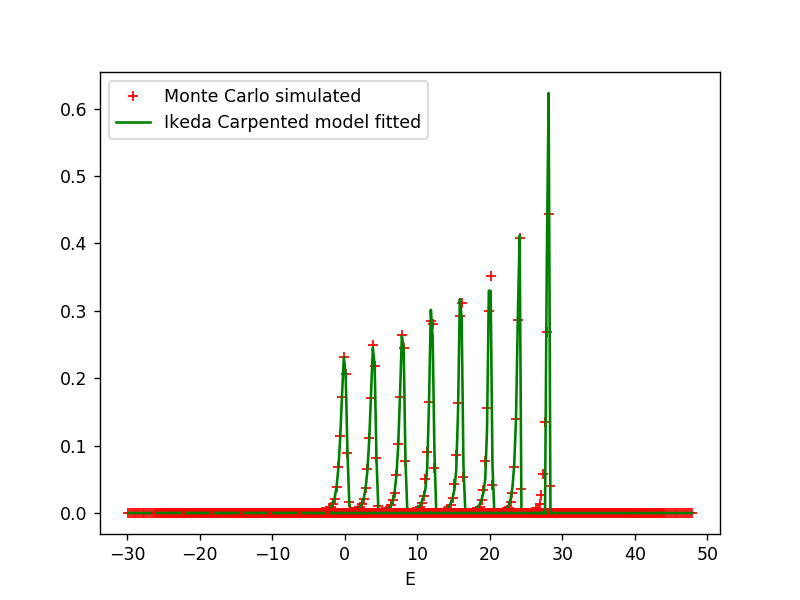

In [32]:
for E0_30 in np.arange(0., 30., 4.):
#     print np.int(E0_30) % 2.0
    name="/home/fi0/dev/sandbox/SR-INS/srins/Jiao_Res/graphite-DOS/Ei_30/out/ie-E_%s.h5" % E0_30
    x_30,y0_30,y0err_30 = getData(name)
    y_30 = icg.resolution(x_30, Ei=30, E0=E0_30, geom=geom, **results_30[E0_30].params.valuesdict())
    y_30/=y_30.sum()
    RF_130.append(y_30)
    RF_x_130.append(x_30)
    a_.append(results_30[E0_30].params['a'].value)
#     plt.plot(x_30,results_30[E0_30].params['a'].value)
    plt.plot(x_30,y0_30, '+', color='red')
    plt.plot(x_30,y_30, color='green')

plt.legend(['Monte Carlo simulated','Ikeda Carpented model fitted'])
plt.xlabel('E')
#     plt.plot(E0, diff)
plt.show()    
    
# plt.xlabel('Energy Transfer')
# plt.ylabel('Intensity')
# # plt.plot(x_30,y_30, color='orange', marker='+')
# plt.show()
# plt.xlabel('Energy Transfer')
# plt.ylabel('Intensity')
# # orange_line = mlines.Line2D([], [], color='orange', label='RF_130')
# red_line = mlines.Line2D([], [], color='red', label='interpolated')
# plt.legend(handles=[ red_line])
# # plt.plot(x_30,y_30, color='orange', marker='+')
# plt.show()

<IPython.core.display.Javascript object>


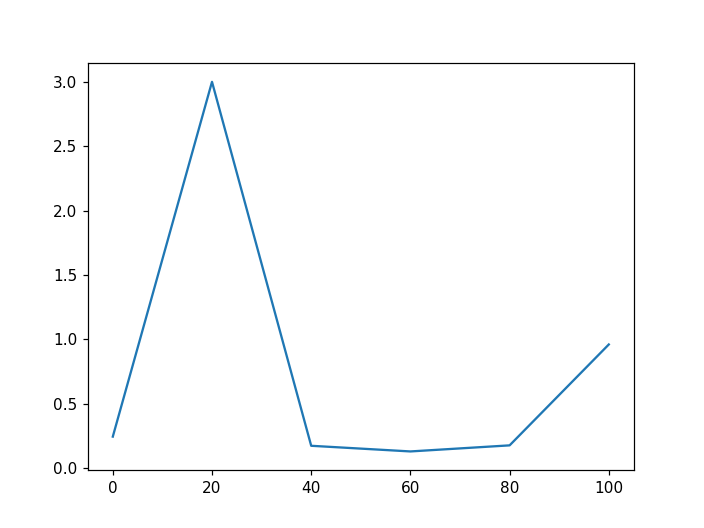

In [90]:
E_=np.arange(0., 120., 20.)
plt.figure()
plt.plot(E_,a_)
plt.show()

fitting 30

In [37]:
Ei=30
results_30 = {}
for E0 in np.arange(0., 30., 10.):
    name="/home/fi0/dev/sandbox/SR-INS/srins/Jiao_Res/graphite-DOS/Ei_30/out/ie-E_%s.h5" % E0
    print E0
    results_30[E0] = fit(name)
    continue

0.0
10.0
20.0


<IPython.core.display.Javascript object>


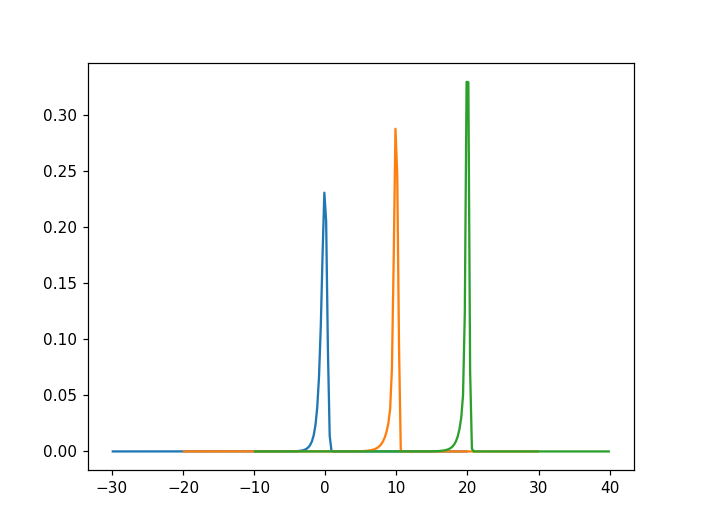

In [38]:
plt.figure()
RF_30=[]
RF_x_30=[]
for E0_30 in np.arange(0., 30., 10.):
    name="/home/fi0/dev/sandbox/SR-INS/srins/Jiao_Res/graphite-DOS/Ei_30/out/ie-E_%s.h5" % E0_30
    x_30,y0_30,y0err_30 = getData(name)
    y_30 = icg.resolution(x_30, Ei=30, E0=E0_30, geom=geom, **results_30[E0_30].params.valuesdict())
    y_30/=y_30.sum()
    RF_30.append(y_30)
    RF_x_30.append(x_30)
    plt.plot(x_30,y_30)
plt.show()

<IPython.core.display.Javascript object>


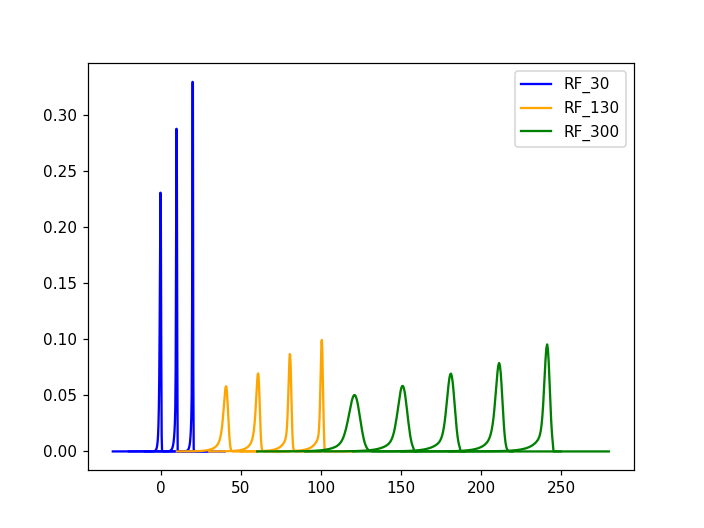

In [66]:
import matplotlib.lines as mlines
plt.figure()
for E01 in np.arange(0, len(RF_30), 1):
    plt.plot(RF_x_30[E01],RF_30[E01]/np.sum(RF_30[E01]), color='blue')
for E01 in np.arange(2, len(RF_130)-1, 1):
    plt.plot(RF_x_130[E01],RF_130[E01]/np.sum(RF_130[E01]), color='orange')
for E0 in np.arange(4, len(RF_300)-1,1):
    plt.plot(RF_x_300[E0],RF_300[E0]/np.sum(RF_300[E01]), color='green')

blue_line = mlines.Line2D([], [], color='blue', label='RF_30')
orange_line = mlines.Line2D([], [], color='orange', label='RF_130')
green_line = mlines.Line2D([], [], color='green', label='RF_300')
plt.legend(handles=[blue_line, orange_line, green_line])
# plt.legend(handles2=[orange_line])
plt.show()

In [ ]:
plt.figure()
for E0 in np.arange(0., 250, 30.):
    

In [ ]:
plt.figure()
plt.plot(E00, diff)
plt.xlabel('Ei')
plt.ylabel('Ei-E_nominal')
plt.show()

In [ ]:
plt.figure()
for E0 in np.arange(0., 300., 5.):
    x,y0,y0err = getData(E0)
    plt.plot(x,y0)
#     plt.plot(x, y)
plt.show()

In [ ]:
E0s = np.arange(0., 300., 5.)
def get_p_list(name):
    return [results[E0].params[name].value for E0 in E0s]

In [ ]:


plt.figure()
plt.plot(E0s, get_p_list('sigma'), label='ori sigma')
plt.legend()
plt.show()

plt.figure()
plt.plot(E0s, get_p_list('a'), label='ori a')
plt.legend()
plt.show()

plt.figure()
plt.plot(E0s, get_p_list('b'), label='ori b')
plt.legend()
plt.show()

plt.figure()
plt.plot(E0s, get_p_list('t0'), label='ori t0')
plt.legend()
plt.show()

In [ ]:
print get_p_list('sigma')

In [ ]:
vals,poly = range(-60,60), range(-60,60)
# print  (vals)
plt.figure()
plt.plot(vals, poly, label='some graph')
plt.show()
roots = [-1,1,2]

mark = [vals.index(i) for i in roots]
print type(mark)
print(mark)
# print poly

In [ ]:
## for 130
print len(E0s)
print E0s
acorr=np.array(get_p_list('a'))
E0=E0s.tolist
print type(E0s)
# a_thres = [x for x in acorr if x < 1.6 and x>0.9]
a_thres_posA_1=np.concatenate((np.where((acorr<1.6) & (acorr>0.9))[0], [42,58]))
values_a_1=acorr[a_thres_posA_1]

print type(values)

a_thres_pos_1=a_thres_posA_1.tolist()
# mark1 = [E0.index(i) for i in a_thres_pos]


# print acorr[a_thres_pos]
plt.figure()
plt.plot (E0s, acorr, marker='x')
plt.plot ( E0s,acorr, markevery=a_thres_pos_1, ls="", marker='o')
plt.show()
print a_thres_pos_1

In [ ]:
indexa1=np.array([1,2,3,4,5,12,13])
a_thres_posA=np.delete(a_thres_posA_1, indexa1)
a_thres_posA=np.delete(a_thres_posA, 4)
a_thres_posA=np.delete(a_thres_posA, 3)
print a_thres_posA
values_a = np.delete(values_a_1, indexa1)
values_a = np.delete(values_a, 4)
values_a = np.delete(values_a, 3)

a_thres_pos_2=a_thres_posA.tolist()

plt.figure()
plt.plot (E0s, acorr, marker='x')
plt.plot ( E0s,acorr, markevery=a_thres_pos_2, ls="", marker='o')
plt.show()

In [ ]:
best_fit = np.poly1d(np.polyfit(a_thres_posA, values_a, 3))(np.unique(a_thres_posA))
print values    
plt.figure()
plt.plot (E0s, acorr, marker='x')
plt.plot(E0s[a_thres_posA], best_fit)
plt.show()

In [ ]:
from scipy.interpolate import interp1d
param = interp1d(E0s[a_thres_posA], best_fit, fill_value='extrapolate', kind='cubic')
E_intlp_300=np.arange(0., 300., 0.1)
param_a=param(E_intlp_300)

plt.figure()
plt.plot(E0s, acorr, marker='x', label ='a' )
# plt.plot(E_intlp_130, param_a, label='refined and interpolated a')
plt.legend()
plt.show()

plt.figure()
# plt.plot(E0s, acorr, marker='x', label ='a' )
plt.plot(E_intlp_300, param_a, label='refined and interpolated a')
plt.legend()
plt.show()

plt.figure()
plt.plot(E0s, acorr, marker='x', label ='a' )
plt.plot(E_intlp_300, param_a, label='refined and interpolated a')
plt.legend()
plt.show()

In [ ]:
# for b

print len(E0s)
bcorr=np.array(get_p_list('b'))
E0=E0s.tolist
print type(E0s)
print bcorr

b_thres_1 = [x for x in bcorr if x < 0.1]
b_thres_posA_1=np.where(bcorr<0.1)[0]
values_b_1=bcorr[b_thres_posA_1]


b_thres_pos_1=np.where(bcorr<0.1)[0].tolist()


plt.figure()
plt.plot (E0s, bcorr, marker='x')
plt.plot ( E0s,bcorr, markevery=b_thres_pos_1, ls="", marker='o')
plt.show()

print len(b_thres_posA_1)

In [ ]:
b_thres_posA=b_thres_posA_1
values_b=values_b_1
# index=[1,3]
# b_thres_posA=np.delete(b_thres_posA_1, index)
# values_b = np.delete(values_b_1, index)

# b_thres_pos=np.delete(b_thres_posA_1, index).tolist()

# plt.figure()
# plt.plot (E0s, bcorr, marker='x')
# plt.plot ( E0s,bcorr, markevery=b_thres_pos, ls="", marker='o')
# plt.show()

In [ ]:
# b_thres = [x for x in bcorr if x < 0.1 and x>0.022]

# b_thres_posA=np.where((bcorr<0.1) & (bcorr>0.022))[0]
# values_b=bcorr[b_thres_posA]

# print type(values)
# print b_thres
# # np.where((a >= 6) & (a <=10))
# b_thres_pos=np.where((bcorr<0.1) & (bcorr>0.021))[0].tolist()
# # mark1 = [E0.index(i) for i in a_thres_pos]

# print b_thres_pos
# # print acorr[a_thres_pos]
# plt.figure()
# plt.plot (E0s, bcorr, marker='x')
# plt.plot ( E0s,bcorr, markevery=b_thres_pos, ls="", marker='o')
# plt.show()

In [ ]:
print(len(b_thres_posA))
best_fit_b = np.poly1d(np.polyfit(b_thres_posA, values_b, 5))(np.unique(b_thres_posA))
print len(best_fit_b)    
plt.figure()
plt.plot (E0s, bcorr, marker='x')

plt.plot(E0s[b_thres_posA], best_fit_b)
# plt.plot(E_intlp_30, best_fit_b(E_intlp_30))
plt.show()



In [ ]:
from scipy.interpolate import interp1d
param = interp1d(E0s[b_thres_posA], best_fit_b, fill_value='extrapolate', kind='cubic')
E_intlp_300=np.arange(0., 300., 0.1)
param_b=param(E_intlp_300)

plt.figure()
plt.plot(E0s, bcorr, marker='x', label ='b' )
# plt.plot(E_intlp_30, param_b, label='refined and interpolated b')
plt.legend()
plt.show()


plt.figure()
# plt.plot(E0s, bcorr, marker='x', label ='b' )
plt.plot(E_intlp_300, param_b, label='refined and interpolated b')
plt.legend()
plt.show()

plt.figure()
plt.plot(E0s, bcorr, marker='x', label ='b' )
plt.plot(E_intlp_300, param_b, label='refined and interpolated b')
plt.legend()
plt.show()


In [ ]:
# for sigma

print len(E0s)
sigcorr=np.array(get_p_list('sigma'))
E0=E0s.tolist
print type(E0s)
print sigcorr

sig_thres_1 = [x for x in sigcorr if x <10 and x>1]
sig_thres_posA_1=np.where((sigcorr<10) & (sigcorr>1))[0]
values_sig_1=sigcorr[sig_thres_posA_1]


sig_thres_pos_1=np.where((sigcorr<10) & (sigcorr>1))[0].tolist()


plt.figure()
plt.plot (E0s, sigcorr, marker='x')
plt.plot ( E0s,sigcorr, markevery=sig_thres_pos_1, ls="", marker='o')
plt.show()

print sig_thres_posA_1

In [ ]:
index_s=np.array([42,48,52,53,54])
print type (index_s)
sig_thres_posA=np.delete(sig_thres_posA_1, index_s)
# sig_thres_posA=np.delete(sig_thres_posAP, 4)
values_sig = np.delete(values_sig_1, index_s)
# values_sig = np.delete(values_sigp, 4)

print sig_thres_posA
sig_thres_pos=sig_thres_posA.tolist()

plt.figure()
plt.plot (E0s, sigcorr, marker='x')
plt.plot ( E0s,sigcorr, markevery=sig_thres_pos, ls="", marker='o')
plt.show()

In [ ]:
print(np.unique(sig_thres_posA))
best_fit_sig = np.poly1d(np.polyfit(sig_thres_posA, values_sig, 6))(np.unique(sig_thres_posA))
print len(best_fit_sig)    
plt.figure()
plt.plot (E0s, sigcorr, marker='x')

plt.plot(E0s[sig_thres_posA], best_fit_sig)
# plt.plot(E_intlp_30, best_fit_sig(E_intlp_30))
plt.show()

In [ ]:
from scipy.interpolate import interp1d
param_sigP = interp1d(E0s[sig_thres_posA], best_fit_sig, fill_value='extrapolate', kind='cubic')
E_intlp_300=np.arange(0., 300., 0.1)
param_sig=param_sigP(E_intlp_300)

plt.figure()
plt.plot(E0s, sigcorr, marker='x', label ='sigma' )
# plt.plot(E_intlp_30, param_b, label='refined and interpolated b')
plt.legend()
plt.show()


plt.figure()
# plt.plot(E0s, bcorr, marker='x', label ='b' )
plt.plot(E_intlp_300, param_sig, label='refined and interpolated sigma')
plt.legend()
plt.show()

plt.figure()
plt.plot(E0s, sigcorr, marker='x', label ='sigma' )
plt.plot(E_intlp_300, param_sig, label='refined and interpolated sigma')
plt.legend()
plt.show()

In [ ]:
# for t0

print len(E0s)
t0corr=np.array(get_p_list('t0'))
E0=E0s.tolist
print type(E0s)
print t0corr

t0_thres_1 = [x for x in t0corr if x <40 and x>3]
t0_thres_posA_1=np.concatenate(([0],np.where((t0corr<40) & (t0corr>3))[0]))
values_t0_1=t0corr[t0_thres_posA_1]


t0_thres_pos_1=t0_thres_posA_1.tolist()


plt.figure()
plt.plot (E0s, t0corr, marker='x')
plt.plot ( E0s,t0corr, markevery=t0_thres_pos_1, ls="", marker='o')
plt.show()

print t0_thres_posA_1

In [ ]:
t0_thres_posA=t0_thres_posA_1
values_t0=values_t0_1
# index_t0=7
# t0_thres_posA=np.delete(t0_thres_posA_1, index_t0)
# # sig_thres_posA=np.delete(sig_thres_posAP, 8)
# values_t0 = np.delete(values_t0_1, index_t0)
# # values_sig = np.delete(values_sigp, 8)

# print t0_thres_posA
# t0_thres_pos=t0_thres_posA.tolist()

# plt.figure()
# plt.plot (E0s, t0corr, marker='x')
# plt.plot ( E0s,t0corr, markevery=t0_thres_pos, ls="", marker='o')
# plt.show()

In [ ]:
print(np.unique(t0_thres_posA))
best_fit_t0 = np.poly1d(np.polyfit(t0_thres_posA, values_t0, 5))(np.unique(t0_thres_posA))
print len(best_fit_t0)    
plt.figure()
plt.plot (E0s, t0corr, marker='x')

plt.plot(E0s[t0_thres_posA], best_fit_t0)
# plt.plot(E_intlp_30, best_fit_sig(E_intlp_30))
plt.show()

In [ ]:
from scipy.interpolate import interp1d
param_t0P = interp1d(E0s[t0_thres_posA], best_fit_t0, fill_value='extrapolate', kind='cubic')
E_intlp_300=np.arange(0., 300., 0.1)
param_t0=param_t0P(E_intlp_300)

plt.figure()
plt.plot(E0s, t0corr, marker='x', label ='t0' )
# plt.plot(E_intlp_30, param_b, label='refined and interpolated b')
plt.legend()
plt.show()


plt.figure()
# plt.plot(E0s, bcorr, marker='x', label ='b' )
plt.plot(E_intlp_300, param_t0, label='refined and interpolated t0')
plt.legend()
plt.show()

plt.figure()
plt.plot(E0s, t0corr, marker='x', label ='t0' )
plt.plot(E_intlp_300, param_t0, label='refined and interpolated t0')
plt.legend()
plt.show()

In [ ]:
np.savetxt('Param_300_Et_a_b_s_t.dat', np.c_[E_intlp_300, param_a,param_b,param_sig,param_t0])

In [ ]:
## for 300
print len(E0s)
acorr=np.array(get_p_list('a'))
E0=E0s.tolist
print type(E0s)
a_thres = [x for x in acorr if x < 0.5]
a_thres_posA=np.where(acorr<0.5)[0]
values=acorr[a_thres_posA]

print type(values)

a_thres_pos=np.where(acorr<0.5)[0].tolist()
# mark1 = [E0.index(i) for i in a_thres_pos]

print a_thres_pos
# print acorr[a_thres_pos]
plt.figure()
plt.plot (E0s, acorr, marker='x')
plt.plot ( E0s,acorr, markevery=a_thres_pos, ls="", marker='o')
plt.show()

In [ ]:
best_fit = np.poly1d(np.polyfit(a_thres_posA, values, 1))(np.unique(a_thres_posA))
print values    
plt.figure()
plt.plot (E0s, acorr, marker='x')
plt.plot(E0s[a_thres_posA], best_fit)
plt.show()

In [ ]:
from scipy.interpolate import interp1d
param = interp1d(E0s[a_thres_posA], best_fit, fill_value='extrapolate', kind='cubic')
E_intlp=np.arange(0., 300., 0.1)
param_a=param(E_intlp)

plt.figure()
plt.plot(E0s, acorr, marker='x', label ='a' )
plt.plot(E_intlp, param_a, label='refined a')
plt.legend()
plt.show()

In [ ]:
print type(get_p_list('b'))
b_=np.array(get_p_list('b'))
print type(b_)
parameter_b = interp1d(E0s, b_, fill_value='extrapolate', kind='cubic')
param_b=parameter_b(E_intlp)
print type(param_b)

In [ ]:
plt.figure()
plt.plot(E_intlp,param_b, label='inter b')
plt.legend()
plt.show()
mask=np.where(param_b<0)[0].tolist()
mask_array=np.where(param_b<0)[0]
print mask_array
print param_b[mask_array]

In [ ]:
E0_array=np.array([E_intlp[mask_array[0]-2], E_intlp[mask_array[0]-1],E_intlp[mask_array[-1]]  ])
b_array=np.array([param_b[mask_array[0]-2], param_b[mask_array[0]-1], 0 ])
print E0_array

mid_int=np.arange(E_intlp[mask_array[0]-2], E_intlp[mask_array[-1]], 0.1)
# print b_array
interpolatelines= np.poly1d(np.polyfit(E0_array, b_array, 1))(np.unique(E0_array))
interpolatelines=np.abs(interpolatelines)
paramB_midI = np.interp(mid_int,E0_array, interpolatelines)

print paramB_midI

In [ ]:
mask_neg=np.where(interpolatelines<0)[0]
print mask_array
print mask_neg
# param_b[mask]=pa
print interpolatelines
plt.figure()
plt.plot(E0_array, b_array, label='b_array')
plt.plot(mid_int,paramB_midI,label='inter' )
plt.legend()
plt.show()

In [ ]:
parameter_b_frist=param_b[0:mask_array[0]-2]
# print type(parameter_b_frist)
# print parameter_b_frist
param_b_mid=interpolatelines
param_b_last=param_b[mask_array[-1]+1::]
# print mask_array[0]-2
# print mask_array[-1]+1


paramB=np.concatenate((parameter_b_frist,paramB_midI, param_b_last) )

# print paramB
M=np.where(paramB<0)
print M
plt.figure()
plt.plot(E_intlp, paramB)
plt.show()

In [ ]:
import smooth as s

In [ ]:
sig=get_p_list('sigma')
sigSmooth=s.savitzky_golay(sig,45,2 )
# sig.set_smoothing_factor(1)
param_sig = np.interp(E_intlp,E0s, sig)

# a=get_p_list('a')

plt.figure()
plt.plot (E_intlp, param_sig)
# plt.plot(sigSmooth)
plt.show()

In [ ]:
t0=get_p_list('t0')
param_t0 = np.interp(E_intlp,E0s, t0)
msk=np.where(param_t0<0)
print msk
plt.figure()
plt.plot (E_intlp, param_t0)
# plt.plot(sigSmooth)
plt.show()

In [ ]:
R=get_p_list('R')
param_R = np.interp(E_intlp,E0s, R)

plt.figure()
plt.plot (E_intlp, param_R)
# plt.plot(sigSmooth)
plt.show()

In [ ]:
np.savetxt('Param_300.dat', np.c_[param_R,param_a,paramB,param_sig,param_t0])

In [ ]:
import makingRF3_orig as M1
model_3001 = M1.ModelFitting(300, 0.1, 3)
# print model_300
print param_a[2000]
RF,time=model_3001.makingRf(0,300,0.1,param_R,param_a, paramB,param_sig,param_t0 )

In [ ]:
arr1=np.asarray (a)
arr3=np.asarray (a)
peak_indexes1= [len(arr1)]
print peak_indexes1
n = 0.7
a_dr=arr1[1:]-arr1[:-1]
while peak_indexes1:
    a_derivative=arr1[1:]-arr1[:-1]
    av, st = np.mean(a_derivative), np.std(a_derivative)
    peak_indexes1 = ( np.where(a_derivative > av + n * st)[0]).tolist()
#     print peak_indexes1
    for i in peak_indexes1:
        
#         plt.plot (arr, marker='*', color='blue')
        arr1[i] = (arr1[i-1] + arr1[i+1]) / 2
#         print arr1
a_refin=np.abs(arr1-a)
n1=1
arr2=np.asarray(arr1)
peak_indexes2=[len (arr_der)]
a_2ndDeriv2=arr2[1:]-arr2[:-1]
while peak_indexes2:
    a_2ndDeriv=arr2[1:]-arr2[:-1]
    av2, st2 = np.mean(a_2ndDeriv), np.std(a_2ndDeriv)
    peak_indexes2 = ( np.where(a_2ndDeriv > av2 + n1 * st2)[0]).tolist()
    for i in peak_indexes2:
        arr3[i] = (arr3[i-1] + arr3[i+1]) / 2
    
print peak_indexes1
plt.figure()
plt.plot(a, color='black', label='a_300')
# plt.plot(a_2ndDeriv2, color='red', label='2nd deriv')
# plt.plot(arr1, marker='o', color='orange', label='arr1')
# plt.plot (a_dr, marker='*', color='blue', label='arr_der')
# plt.plot (arr3, marker='+', color='green', label='arr2')
# plt.plot (arr_der, marker='*', color='blue', label='arr_der')
plt.legend()
plt.show()

In [ ]:
## written by Jose
n = 0.4
arr = np.asarray(a)
# print len(arr)
peak_indexes = [1,]
# print peak_indexes
# print arr[:-1]
while peak_indexes:
    a_deriv = arr[1:] - arr[:-1]
    
    av, st = np.mean(a_deriv), np.std(a_deriv)
    peak_indexes = (1 + np.where(a_deriv > av + n * st)[0]).tolist()
#     print peak_indexes
    for i in peak_indexes:
        
#         plt.plot (arr, marker='*', color='blue')
        try:
            arr[i] = (arr[i-1] + arr[i+1]) / 2
        except IndexError:
            pass
#         continue
           


#aSmooth=s.savitzky_golay(a,25,2 )
# sig.set_smoothing_factor(1)
plt.figure()
plt.plot(a, color='black')
plt.plot (arr, marker='*', color='blue')
#plt.plot(aSmooth)
plt.show()

In [ ]:
from scipy.interpolate import interp1d
from scipy.interpolate import pchip

In [ ]:
from scipy.interpolate import UnivariateSpline

In [ ]:
Et=np.arange(0., 130., 0.1)
# sigma = interp1d(E0s, get_p_list('sigma'), fill_value='extrapolate', kind='cubic')(Et)
# a=interp1d(E0s, get_p_list('a'), fill_value='extrapolate', kind='cubic')(Et)
# b=interp1d(E0s, get_p_list('b'), fill_value='extrapolate', kind='cubic')(Et)
# R=interp1d(E0s, get_p_list('R'), fill_value='extrapolate', kind='cubic')(Et)
# t0=interp1d(E0s, get_p_list('t0'), fill_value='extrapolate', kind='cubic')(Et)
np.interp
# sigma1 = pchip(E0s, get_p_list('sigma'))(Et)
sigmaN = UnivariateSpline(E0s, get_p_list('sigma'))
print sigmaN
sigmaN.set_smoothing_factor(1)
ny = sigmaN(Et).clip(0,max(sigmaN(E0s)))
spl2 = UnivariateSpline(Et, ny)
sig=spl2(Et)

In [ ]:
aN = UnivariateSpline(E0s, get_p_list('a'))
aN.set_smoothing_factor(1)
na = aN(Et).clip(0,max(aN(E0s)))
a2 = UnivariateSpline(Et, na)
a_et=a2(Et)

In [ ]:
bN = UnivariateSpline(E0s, get_p_list('b'))
bN.set_smoothing_factor(1)
nb = bN(Et).clip(0,max(bN(E0s)))
b2 = UnivariateSpline(Et, nb)
b_et=b2(Et)

In [ ]:
RN = UnivariateSpline(E0s, get_p_list('R'))
RN.set_smoothing_factor(1)
Rb = RN(Et).clip(0,max(RN(E0s)))
R2 = UnivariateSpline(Et, Rb)


In [ ]:
t0N = UnivariateSpline(E0s, get_p_list('t0'))
t0N.set_smoothing_factor(2)
t0b = t0N(Et).clip(0,max(t0N(E0s)))
t02 = UnivariateSpline(Et, t0b)
t0_et=t02(Et)

In [ ]:
a=pchip(E0s, get_p_list('a'))(Et)
b=pchip(E0s, get_p_list('b'))(Et)
R=pchip(E0s, get_p_list('R'))(Et)
t0=pchip(E0s, get_p_list('t0'))(Et)

In [ ]:
index_t0N=np.where(t0_et<0)[0]
print 't0', min(index_t0N), max (index_t0N)

index_aN=np.where(a_et<0)[0]
print 'a',min(index_aN), max (index_aN)

index_bN=np.where(b_et<0)[0]
print 'b', min(index_bN), max(index_bN)

sig=spl2(Et)
index_sigN=np.where(sig<0)[0]
# print 'sig', min(index_sigN), max (index_sigN)

In [ ]:
plt.figure()
# plt.plot(Et, get_p_list('sigma'), label='sigma')
plt.plot(Et, t02(Et), label='t0')
# plt.plot(E0s, get_p_list('b'), label='b')
# plt.plot(E0s, get_p_list('R'), label='R')
# plt.plot(E0s, get_p_list('sigma'), label='sigma')
# plt.plot(E0s, get_p_list('sigma'), label='sigma')
plt.legend()
plt.show()

plt.figure()
plt.plot(Et, a_et, label='a')
plt.legend()
plt.show()

plt.figure()
plt.plot (Et, b_et, label='b')
plt.legend()
plt.show()



In [ ]:
from mcni.utils import conversion as Conv
l=16.6
v = Conv.e2v(130.)
print v

In [ ]:
t01=(l/v)*1e6
print t01*1e6

In [ ]:
plt.figure()
plt.plot(E0s, get_p_list('t0')+t01, label='t0')
# plt.plot(E0s, get_p_list('b'), label='b')
# plt.plot(E0s, get_p_list('R'), label='R')
# plt.plot(E0s, get_p_list('sigma'), label='sigma')
# plt.plot(E0s, get_p_list('sigma'), label='sigma')
plt.legend()
plt.show()

In [ ]:
with open('Resolution_Function_300.txt','wb') as f:
    for line in RF2_mat:
        np.savetxt(f, line)
